# Detection of cells with machine learning


## Preprocessing data for cell detection
This notebook is used to preprocess the data for cell detection. It includes loading the dataset, resizing images, and saving the processed images.

## Prepare the environment

### Install requirements

In [1]:
!pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable


### Import libraries

In [2]:
import glob
import os
import zipfile
import matplotlib.pyplot as plt
import skimage
import json


## Loading dataset

In [4]:
def extract_images(path):
  """
  Extract images from a zip file.

  Args:
    path: The path to the zip file.

  Returns:
    None
  """
  with zipfile.ZipFile(path, 'r') as zip_ref:
    extract_path = os.path.dirname(path)
    zip_ref.extractall(extract_path)
def show_images(images, num_samples=30, cols=6):
    plt.figure(figsize=(10,10))
    idx = int(len(images) / num_samples)

    for i, img in enumerate(images):
        if i % idx == 0:
            plt.subplot(int(num_samples/cols) + 1, cols, int(i/idx) + 1)
            plt.axis('off')
            plt.imshow(skimage.io.imread(img))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    plt.show()

### Loading images

In [9]:
raw_path= "../datasets/BCCD_raw.zip"
extract_images(raw_path)
train = glob.glob(os.path.join('../datasets',"BCCD_raw", "BCCD","train",'*.jpg'))
valid = glob.glob(os.path.join('../datasets',"BCCD_raw", "BCCD",'valid','*.jpg'))
test =glob.glob(os.path.join('../datasets',"BCCD_raw", "BCCD",'test','*.jpg'))

Number of images in the training set: 224
Number of images in the validation set: 65
Number of images in the test set: 31
Total number of images: 320

 Sample of the images 



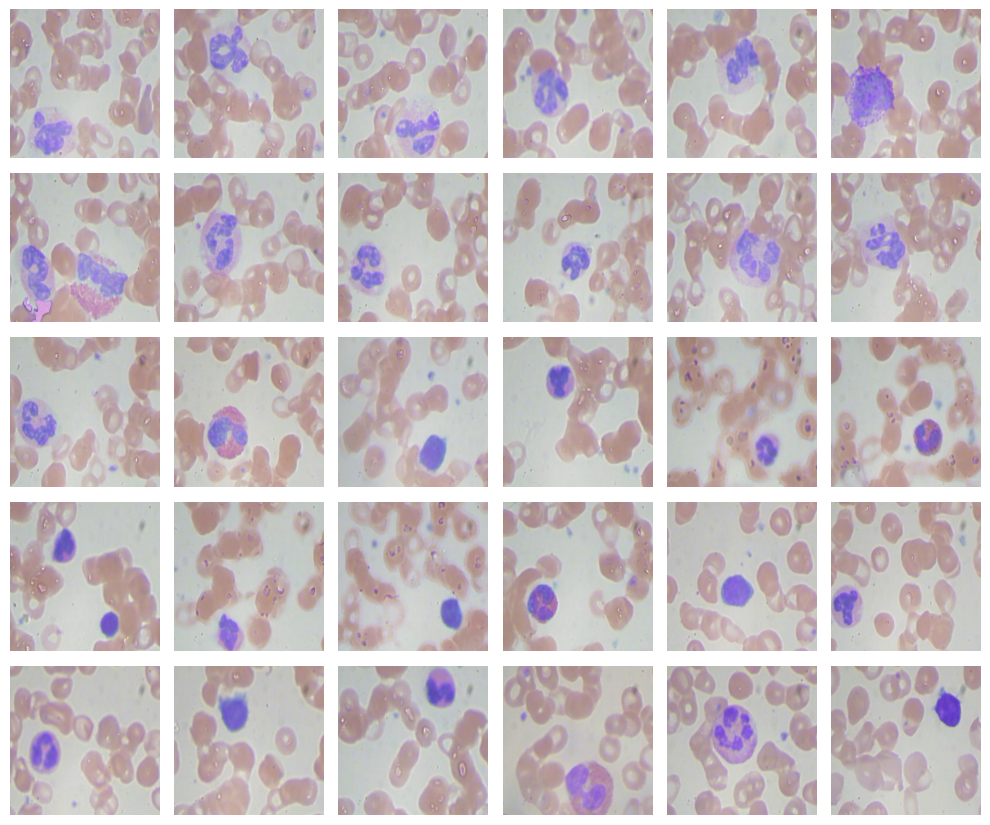

In [10]:
print(f"Number of images in the training set: {len(train)}")
print(f"Number of images in the validation set: {len(valid)}")
print(f"Number of images in the test set: {len(test)}")
print(f"Total number of images: {len(train) + len(valid) + len(test)}")
print("\n Sample of the images \n")

images_to_show = train[:10] + valid[:10] + test[:10]
show_images(images_to_show)


Loading Annotations

In [ ]:
trainAnnotacion = open(os.path.join('../datasets',"BCCD_raw", "BCCD","train",'_annotations.coco.json'))

dict_train = json.load(trainAnnotacion)

valAnnotacion = open(os.path.join('../datasets',"BCCD_raw", "BCCD","valid",'_annotations.coco.json'))
dict_val = json.load(valAnnotacion)

testAnnotacion = open(os.path.join('../datasets',"BCCD_raw", "BCCD","test",'_annotations.coco.json'))
dict_test = json.load(testAnnotacion)

### Strutere of the annotations

In [38]:
print(dict_test.keys())


dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])


In [41]:
print("Information of images:")
print(dict_test['images'][0])

print("\nImage annotation:")
print(dict_test['annotations'][0])

print("\nCategories:")
print(dict_test['categories'])


Information of images:
{'id': 0, 'license': 1, 'file_name': 'BloodImage_00386_jpg.rf.2e486a520c96838de90f3e4abccd0f66.jpg', 'height': 416, 'width': 416, 'date_captured': '2022-01-29T04:11:27+00:00'}

Image annotation:
{'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [1, 264, 68, 102.5], 'area': 6970, 'segmentation': [], 'iscrowd': 0}

Categories:
[{'id': 0, 'name': 'cells', 'supercategory': 'none'}, {'id': 1, 'name': 'Platelets', 'supercategory': 'cells'}, {'id': 2, 'name': 'RBC', 'supercategory': 'cells'}, {'id': 3, 'name': 'WBC', 'supercategory': 'cells'}]


In [42]:
print("General information of the annotations")
print(json.dumps(dict_test, indent=2))

General information of the annotations
{
  "info": {
    "year": "2022",
    "version": "1",
    "description": "Exported from roboflow.ai",
    "contributor": "Roboflow",
    "url": "https://app.roboflow.ai/datasets/bccd-pl7zj/1",
    "date_created": "2022-01-29T04:11:27+00:00"
  },
  "licenses": [
    {
      "id": 1,
      "url": "https://choosealicense.com/licenses/mit/",
      "name": "MIT"
    }
  ],
  "categories": [
    {
      "id": 0,
      "name": "cells",
      "supercategory": "none"
    },
    {
      "id": 1,
      "name": "Platelets",
      "supercategory": "cells"
    },
    {
      "id": 2,
      "name": "RBC",
      "supercategory": "cells"
    },
    {
      "id": 3,
      "name": "WBC",
      "supercategory": "cells"
    }
  ],
  "images": [
    {
      "id": 0,
      "license": 1,
      "file_name": "BloodImage_00386_jpg.rf.2e486a520c96838de90f3e4abccd0f66.jpg",
      "height": 416,
      "width": 416,
      "date_captured": "2022-01-29T04:11:27+00:00"
    },
    